In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm, binom, poisson, geom, expon
from math import sqrt

In [2]:
data=pd.read_csv("walmart_data.txt")

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


## 1. Defining Problem Statement and Analyzing basic metrics
    a. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
    b. Non-Graphical Analysis: Value counts and unique attributes
    c. Visual Analysis - Univariate & Bivariate
        i. For continuous variable(s): Distplot, countplot, histogram for univariate analysis
        ii. For categorical variable(s): Boxplot
        iii. For correlation: Heatmaps, Pairplots

Problem Statement :
> Since the Management team at Walmart Inc. wants to analyze the customer purchase behavior against the customer’s gender and the various other factors to help the business make better decisions. So, we need to analyse the data for
>    - purchase affected by Gender
>    - purchase made for different city category
>    - purchase for different age groups
>    - purchase based on Marital status, and so on.

In [4]:
data.shape

(550068, 10)

> From the shape of the data, we can infer that we have 10 columns of data for around 5.5 millions of rows of data. Hence, for analysis we cannot consider all data. Taking samples of data for analysis will be an ideal approach.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


> From above code, we can observe that data type is correctly labelled. Also, there is no null data in the provided dataset.

In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


> The statistical calculation shown above for columns with integer values doesn't make any sense for us except for PURCHASE column.
> From the describe function calculation, we can see that
>> - mean of the purchase values is around 9264
>> - standard deviation of purchase from mean is 5023
>> - we can see count of purchases lying below given different percentage of data.
>> - we can also see the min and max purchase data

In [7]:
data['Occupation'].nunique()

21

> Although the occupation is a masked value, but we can see that total of 21 different occupation people have purchased and later we can see the distribution as well.

In [8]:
data['Stay_In_Current_City_Years'].value_counts()

1     193821
2     101838
3      95285
4+     84726
0      74398
Name: Stay_In_Current_City_Years, dtype: int64

> In the above calculation, we have a distribution of number of purchases based on different numbers of stay in current city.

In [9]:
data2=data.copy()

In [10]:
data2['Stay_In_Current_City_Years'].replace(['0'],[0],inplace=True)
data2['Stay_In_Current_City_Years'].replace(['1'],[1],inplace=True)
data2['Stay_In_Current_City_Years'].replace(['2'],[2],inplace=True)
data2['Stay_In_Current_City_Years'].replace(['3'],[3],inplace=True)
data2['Stay_In_Current_City_Years'].replace(['4+'],[4],inplace=True)

> In order to do some statistical analysis on the number of years of stay and the purchases made, we have converted the values from object type to int type.

In [11]:
data['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

> Above is the value counts of purchases made by the 2 different gender people.

In [12]:
data2['Gender'].replace(['M'],[0],inplace=True)
data2['Gender'].replace(['F'],[1],inplace=True)

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  int64 
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  int64 
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 42.0+ MB


> We have converted categorical value to integet value for Age & Stay_In_Current_City_Years to do some correction analysis with purchases made.

In [14]:
data2[['Gender','Occupation','Stay_In_Current_City_Years','Marital_Status','Purchase']].corr()

,Gender,Occupation,Stay_In_Current_City_Years,Marital_Status,Purchase
Gender,1.000000,-0.117291,-0.014660,0.011603,-0.060346
Occupation,-0.117291,1.000000,0.030005,0.024280,0.020833
Stay_In_Current_City_Years,-0.014660,0.030005,1.000000,-0.012819,0.005422
Marital_Status,0.011603,0.024280,-0.012819,1.000000,-0.000463
Purchase,-0.060346,0.020833,0.005422,-0.000463,1.000000


> From the above correlation of Purchase with other different attributes, these is no significant relation since the correlation factor values are very small compared to 1 & -1 values.

<AxesSubplot:xlabel='Age', ylabel='Count'>

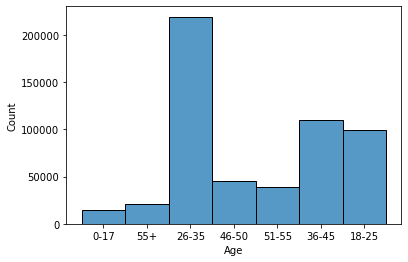

In [15]:
sns.histplot(data['Age'])

> The histogram chart created is count of purchases for different age groups.

C:\Users\amank\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Occupation', ylabel='Density'>

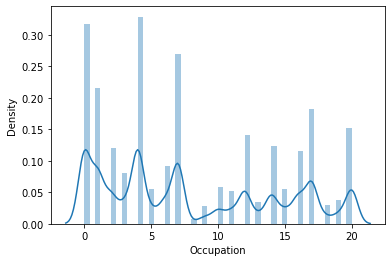

In [16]:
sns.distplot(data['Occupation'])

> Although Occupation data is masked but we have a dist plot to show the density for different purchases based on occupation.

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

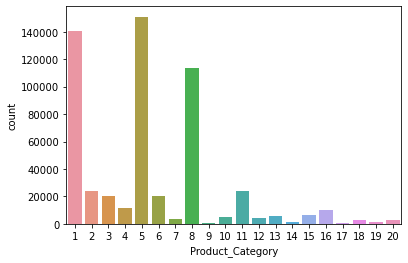

In [17]:
sns.countplot(data=data,x='Product_Category')

> Although Product category values are masked, but above count plot created to show the number of purchases made for different product categories. However, it only shows the purchase count and not the values.

<AxesSubplot:xlabel='Product_Category', ylabel='Purchase'>

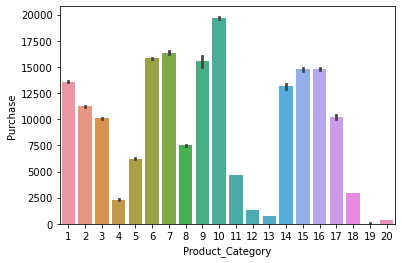

In [18]:
sns.barplot(x=data['Product_Category'],y=data['Purchase'])

> Above chart shows the value of purchases made for different product categories.

<AxesSubplot:xlabel='Marital_Status', ylabel='Purchase'>

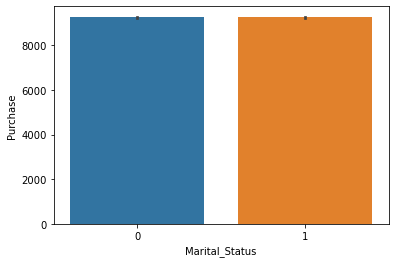

In [19]:
sns.barplot(x=data['Marital_Status'],y=data['Purchase'])

> Single & married people contribute equally to the purchase of the products.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

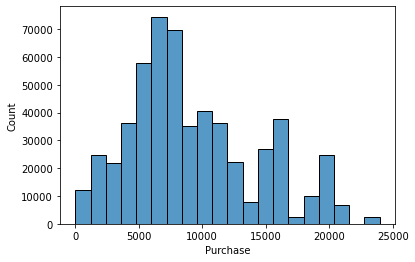

In [20]:
sns.histplot(data=data, x= 'Purchase', bins= 20)

> The above histogram plot shows the count of purchases made for different amount of purchases.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

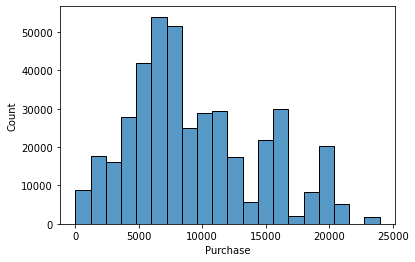

In [21]:
sns.histplot(data=data.loc[data['Gender']=='M'], x= 'Purchase', bins = 20)

> The above histogram plot shows the count of purchases made for different amount of purchases for Men.

<AxesSubplot:xlabel='Purchase', ylabel='Count'>

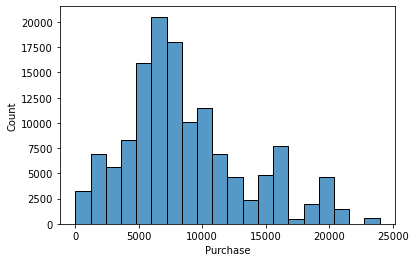

In [22]:
sns.histplot(data=data.loc[data['Gender']=='F'], x= 'Purchase', bins = 20)

> The above histogram plot shows the count of purchases made for different amount of purchases for Female.

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

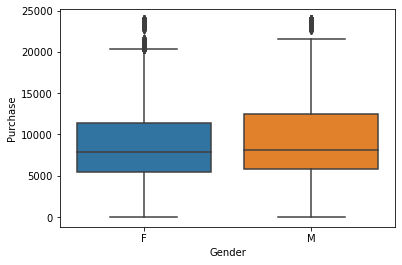

In [23]:
sns.boxplot(data=data, x='Gender',y='Purchase')

> The above is a boxplot for both gender and in order to compare the median purchase amount values. Also, we can observe some outliers for both gender type.

<AxesSubplot:>

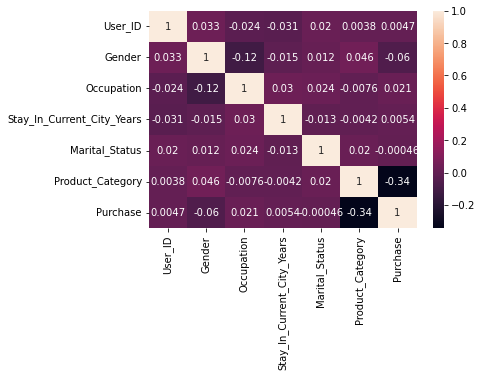

In [24]:
sns.heatmap(data2.corr(),annot=True)

> From the above heatmap, we can see that, the is not significant direct correction with Purchase amount for different attributes.

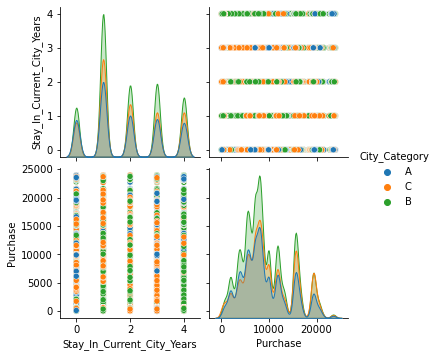

In [25]:
sns.pairplot(data2[['City_Category','Stay_In_Current_City_Years','Purchase']],hue='City_Category')

## 2. Missing Value & Outlier Detection

In [26]:
pd.isnull(data).sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

> The missing values calculated above is for all column data and there is no missing value in the dataset.

In [27]:
mean_purchase=round(data['Purchase'].mean(),2)
mean_purchase

9263.97

In [28]:
q1 = np.percentile(data['Purchase'], 0.25)
q3 = np.percentile(data['Purchase'], 0.75)

iqr = q3 - q1

upper_limit = q3 + 1.5*iqr
lower_limit = q1 - 1.5*iqr

lower_limit,upper_limit

(-579.0, 1125.0)

<AxesSubplot:xlabel='Gender', ylabel='Purchase'>

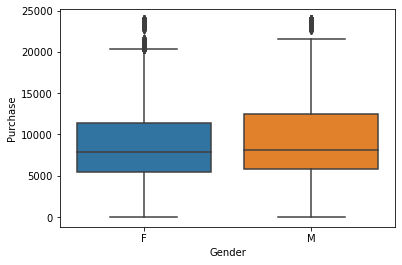

In [29]:
sns.boxplot(data=data,y='Purchase',x='Gender')

> For detecting outliers, we calculated median, upper limit and lower limit for the purchase distribution. Also, to compare and then decide on outliers, we can use the boxplot and the limit values calculated.

## 3. Business Insights based on Non- Graphical and Visual Analysis
    a. Comments on range of attributes
    b. Comments on the distribution of the variables and relationship between them
    c. Comments for each univariate and bivariate plot

> 1. Number of Purchase made by men is higher than that of female.
> 2. People of age group 26-35 have highest number of purchases made.
> 3. People staying in current city for 1 years are more likely to make a purchase.
> 4. Product Category 1,5 & 8 (masked values) have more number of purchases made.
> 5. However, amount of purchases made doesn't depend on the count of purchases made.
> 6. Purchase amount distribution is left skewed for overall data, male or female set of data.
> 7. There is no significant single attribute impact on the purchases made.
> 8. City Category B has relatively more purchases than the other 2 city categories.
> 9. No Missing data in the dataset.
> 10. Purchase amount ranging from 0 to 1125 are the limits, values outside this range can treated as outliers.

## Answering questions
    a. Are women spending more money per transaction than men? Why or Why not?
    b. Confidence intervals and distribution of the mean of the expenses by female and
    male customers
    c. Is confidence intervals of average male and female spend overlapping? How can
    Walmart leverage this conclusion to make changes or improvements?
    d. Results when the same activity is performed for Married vs Unmarried
    e. Results when the same activity is performed for Age

In [30]:
data.groupby(['Gender'])[['Purchase']].mean()

,Purchase
Gender,
F,8734.565765
M,9437.526040


> As we can see in the above calculation, the mean purchase value for men is more than women. So, we can say that the money spent per transaction is more for men than women.

In [31]:
# Let us consider 1000 samples from population data having 300 observations each sample.

num_observ = 300

num_samples = 1000

pop_means = []

for i in range(num_observ):
    sample = data["Purchase"].sample(num_samples)

    pop_means.append(round(sample.mean(), 2))

<AxesSubplot:ylabel='Count'>

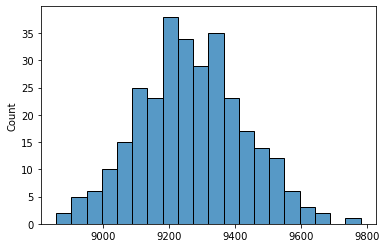

In [32]:
sns.histplot(pop_means, bins = 20)

> The mean samples seems to be normally distributed, and the mean value is around 9250, which is similar to the calculated mean value for population equal to 9264.

In [33]:
# let us draw the similar insights based on gender.

data_male=data.loc[data['Gender']=='M']
data_female=data.loc[data['Gender']=='F']

In [34]:
num_observ = 300

num_samples = 1000

male_means = []
female_means = []

for i in range(num_observ):
    sample_men = data_male["Purchase"].sample(num_samples)
    sample_women = data_female["Purchase"].sample(num_samples)

    male_means.append(round(sample_men.mean(), 2))
    female_means.append(round(sample_women.mean(), 2))

<AxesSubplot:ylabel='Count'>

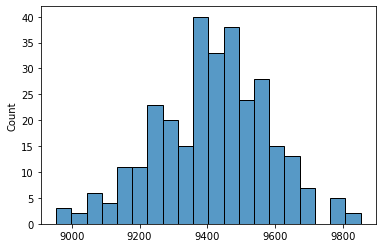

In [35]:
sns.histplot(male_means, bins = 20)

<AxesSubplot:ylabel='Count'>

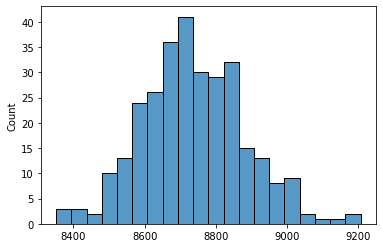

In [36]:
sns.histplot(female_means, bins = 20)

> The distribution of sample means for both male & female are normally distributed. Also, the mean of means for men and women are similar to the calculated value from population data (9.4k for men and 8.7k from women)

> Hence it obeys the Central Limit Theorem.

In [37]:
left = np.percentile(male_means, 2.5)
right = np.percentile(male_means, 97.5)

print("Confidence interval for men's purchase: ", [left, right])

Confidence interval for men's purchase:  [9062.738500000001, 9712.031]


In [38]:
left = np.percentile(female_means, 2.5)
right = np.percentile(female_means, 97.5)

print("Confidence interval for women's purchase: ", [left, right])

Confidence interval for women's purchase:  [8474.9085, 9020.4945]


> The CIs for men & women purchase are very different and do not overlap at all. So, walmart needs to figure out the way to increase the sales for women.

In [39]:
# similar analysis based on marital status

data.groupby(['Marital_Status'])[['Purchase']].mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


In [40]:
data_single=data.loc[data['Marital_Status']==0]
data_married=data.loc[data['Marital_Status']==1]

num_observ = 300

num_samples = 1000

single_means = []
married_means = []

for i in range(num_observ):
    sample_single = data_single["Purchase"].sample(num_samples)
    sample_married = data_married["Purchase"].sample(num_samples)

    single_means.append(round(sample_single.mean(), 2))
    married_means.append(round(sample_married.mean(), 2))

<AxesSubplot:ylabel='Count'>

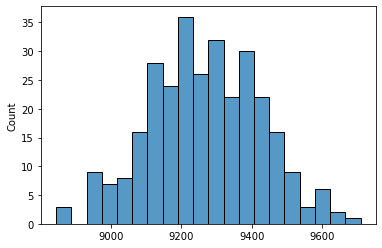

In [41]:
sns.histplot(single_means, bins = 20)

<AxesSubplot:ylabel='Count'>

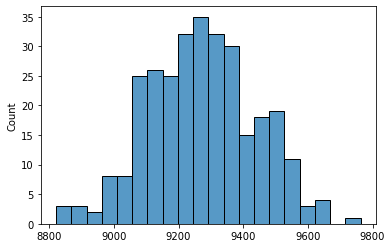

In [42]:
sns.histplot(married_means, bins = 20)

In [43]:
left = np.percentile(single_means, 2.5)
right = np.percentile(single_means, 97.5)

print("Confidence interval for single person purchase: ", [left, right])

left = np.percentile(married_means, 2.5)
right = np.percentile(married_means, 97.5)

print("Confidence interval for married people purchase: ", [left, right])

Confidence interval for single person purchase:  [8967.83, 9580.406]
Confidence interval for married people purchase:  [8959.7705, 9582.809]


> The mean distribution is normal for both single & married people. Also, the mean of means is same as the means calculated from the population data. CIs are also very much similar both single and married people.

In [44]:
# let us draw the similar insights based on Age.
data.groupby(['Age'])[['Purchase']].mean()

,Purchase
Age,
0-17,8933.464640
18-25,9169.663606
26-35,9252.690633
36-45,9331.350695
46-50,9208.625697
51-55,9534.808031
55+,9336.280459


In [45]:
for i in data['Age'].unique():
    data_age=data.loc[data['Age']==i]

    num_observ = 300
    num_samples = 1000

    means_i = []

    for j in range(num_observ):
        sample_i = data_age["Purchase"].sample(num_samples)

        means_i.append(round(sample_i.mean(), 2))

    left = np.percentile(means_i, 2.5)
    right = np.percentile(means_i, 97.5)

    print("Confidence interval for {} age person purchase: ".format(i), [left, right])

Confidence interval for 0-17 age person purchase:  [8621.224750000001, 9233.64075]
Confidence interval for 55+ age person purchase:  [9049.6805, 9638.144]
Confidence interval for 26-35 age person purchase:  [8941.109, 9561.84175]
Confidence interval for 46-50 age person purchase:  [8914.58, 9521.94975]
Confidence interval for 51-55 age person purchase:  [9217.369, 9832.50425]
Confidence interval for 36-45 age person purchase:  [8991.3505, 9628.713749999999]
Confidence interval for 18-25 age person purchase:  [8860.28525, 9450.69775]


> The mean distribution is normal for all aged people. Also, the mean of means is same as the means calculated from the population data. CIs are also very much similar all aged people.

## 5. Final Insights 

> 1. CIs of men and women purchase doesn't overlap and men have higher upper limit of purchasing the products.
> 2. Age group of 26-35 are more frequent buyers.
> 3. Age group 0-17 have the least buy from the company.
> 4. Occupation label - 0,4 & 7 (masked value) have more purchase density
> 5. Product Category - 1,5 & 8 purchase has more frequency.
> 6. Product category - 4,12,13,19 & 20 contribute least to the overall purchase amount.
> 7. City Category - B has more number of purchases.
> 8. People living in current city for 1 year make highest number of purchases.
> 9. People with less than a year or 4+ years in the city have least number of purchases.
> 10. Both single & married people contribute equally to the sale.

## 6. Recommendations

> 1. Increase female product inventory and implement offers to increase female purchase.
> 2. Keep male buyers retension in check, since they contribute a lot to the sale.
> 3. Focus of introducing more customer engagement for kids and teenagers to increase the purchase of 0-17 age group.
> 4. keep the inventory with enough stock for 26-35 age buyers products.
> 5. Bring out offers and products to increase the purchase for lower purchase density based on occupation.
> 6. Maintain the product stock for Product Category - 1,5 & 8.
> 7. Bring out offers to increase the sale of other categories.
> 8. Bring out regulations for the least purchase contributor product catrgories to increase sale or drop from the sale.
> 9. Introduce offers to bring out more customers in City Category - A & C.
> 10. Expend on advertisement to bring out more customers who are new to the city and can introduce membership offers to retain people who live longer in the current city. 
